In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train=pd.read_csv('train_V2.csv')
test=pd.read_csv('test_V2.csv')

In [43]:
train[train.winPlacePerc.isnull()]
train.drop(2744604,inplace=True)

In [44]:
# create new feature player_played

train['player_played']=train.groupby('matchId')['matchId'].transform('count')


# test

test['player_played']=test.groupby('matchId')['matchId'].transform('count')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446965 entries, 0 to 4446965
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints        

In [46]:
#total_distance   #train.
train['total_distance']=train.rideDistance+train.walkDistance+train.swimDistance

In [47]:

# total distance  #test
test['total_distance']=test.rideDistance+test.walkDistance+test.swimDistance

In [48]:

# kills_without_moving

#kills
#total_distance

#train
train['kills_without_moving']=((train['kills']>0)&(train['total_distance']==0))

#test
test['kills_without_moving']=((test['kills']>0)&(test['total_distance']==0))

In [49]:
train['kills_without_moving'].value_counts()

test['kills_without_moving'].value_counts()

kills_without_moving
False    1933863
True         311
Name: count, dtype: int64

In [50]:
train.drop(train[train['kills_without_moving']==True].index,inplace=True)


test.drop(test[test['kills_without_moving']==True].index,inplace=True)

In [51]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'player_played',
       'total_distance', 'kills_without_moving'],
      dtype='object')

In [52]:
train.drop(['kills_without_moving'], axis =1,inplace = True)
test.drop(['kills_without_moving'], axis =1,inplace = True)

In [53]:
train['players_joined'] = train.groupby('matchId')['matchId'].transform('count')
test['players_joined'] = test.groupby('matchId')['matchId'].transform('count')


In [54]:
train['players_in_a_team'] = train.groupby('groupId').groupId.transform('count')
test['players_in_a_team'] = test.groupby('groupId').groupId.transform('count')



In [55]:
team_mapper = lambda x: 1 if ('solo' in x) else 2 if ('duo' in x) else 4
train["max_team"] = train['matchType'].apply(team_mapper)
train['a'] = train["players_in_a_team"] > train["max_team"]
train['a'] .value_counts()

a
False    3528650
True      916780
Name: count, dtype: int64

In [56]:
team_mapper = lambda x: 1 if ('solo' in x) else 2 if ('duo' in x) else 4
test["max_team"] = test['matchType'].apply(team_mapper)
test['a'] = test["players_in_a_team"] > test["max_team"]
test['a'] .value_counts()

a
False    1539282
True      394581
Name: count, dtype: int64

In [57]:
train.drop(train[train['a'] == True].index , inplace = True )

In [58]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'player_played',
       'total_distance', 'players_joined', 'players_in_a_team', 'max_team',
       'a'],
      dtype='object')

In [59]:
test.drop(test[test['a'] == True].index , inplace = True )

In [60]:
train['a'].value_counts()

a
False    3528650
Name: count, dtype: int64

In [61]:
test['a'].value_counts()

a
False    1539282
Name: count, dtype: int64

In [62]:
train.drop(['a'], axis =1,inplace = True)

In [63]:
test.drop(['a'], axis =1,inplace = True)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528650 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa

In [30]:

# roadKills count


train['roadKills'].value_counts()

roadKills
0     3516869
1       10182
2        1180
3         274
4          68
5          33
6          19
7          11
8           6
9           2
11          2
10          2
14          1
18          1
Name: count, dtype: int64

In [31]:
#test

train.drop(train[train['roadKills']>=10].index,inplace=True)

#test 

test.drop(test[test['roadKills']>=10].index,inplace=True)

In [32]:
train['kills'].value_counts()

kills
0     1874871
1      765887
2      411460
3      210185
4      115663
5       62892
6       36176
7       20854
8       12166
9        7206
10       4283
11       2517
12       1573
13        991
14        627
15        398
16        235
17        166
18        117
19         66
20         61
22         43
21         42
23         22
24         18
28         14
26         14
25         12
31          9
27          8
30          7
36          6
38          6
33          5
35          4
29          4
41          4
32          3
53          3
37          2
44          2
34          2
56          2
42          2
55          2
57          2
39          2
45          1
72          1
43          1
49          1
48          1
40          1
47          1
50          1
65          1
46          1
Name: count, dtype: int64

In [33]:
test['kills'].value_counts()

kills
0     817339
1     334532
2     180290
3      91586
4      50347
5      27452
6      15815
7       8965
8       5119
9       3183
10      1843
11      1120
12       643
13       403
14       219
15       133
16       107
17        62
18        32
19        25
20        16
22         7
30         6
21         6
24         5
25         4
23         3
28         3
37         2
32         2
26         2
36         2
56         1
41         1
46         1
40         1
31         1
27         1
Name: count, dtype: int64

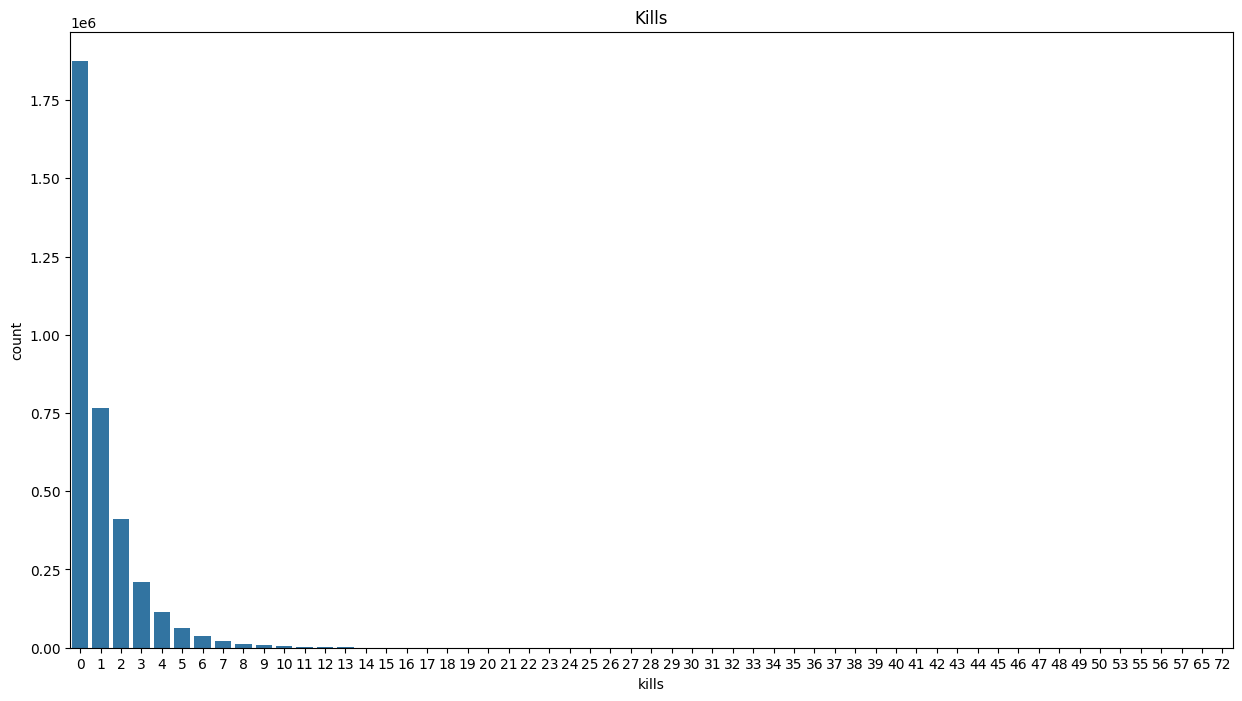

In [36]:

plt.subplots(figsize=(15,8))
sns.countplot(data=train,x=train['kills'])
plt.title('Kills')
plt.show()

In [37]:

# drop the outliers.

#train
train.drop(train[train['kills']>=35].index,inplace=True)

#test

test.drop(test[test['kills']>=35].index,inplace=True)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539271 entries, 0 to 1934173
Data columns (total 33 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1539271 non-null  object 
 1   groupId            1539271 non-null  object 
 2   matchId            1539271 non-null  object 
 3   assists            1539271 non-null  int64  
 4   boosts             1539271 non-null  int64  
 5   damageDealt        1539271 non-null  float64
 6   DBNOs              1539271 non-null  int64  
 7   headshotKills      1539271 non-null  int64  
 8   heals              1539271 non-null  int64  
 9   killPlace          1539271 non-null  int64  
 10  killPoints         1539271 non-null  int64  
 11  kills              1539271 non-null  int64  
 12  killStreaks        1539271 non-null  int64  
 13  longestKill        1539271 non-null  float64
 14  matchDuration      1539271 non-null  int64  
 15  matchType          1539271 non-null  

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528597 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa

C:\Users\sarth\AppData\Local\Temp\ipykernel_19004\241008008.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['longestKill'],bins=20)


<Axes: xlabel='longestKill', ylabel='Density'>

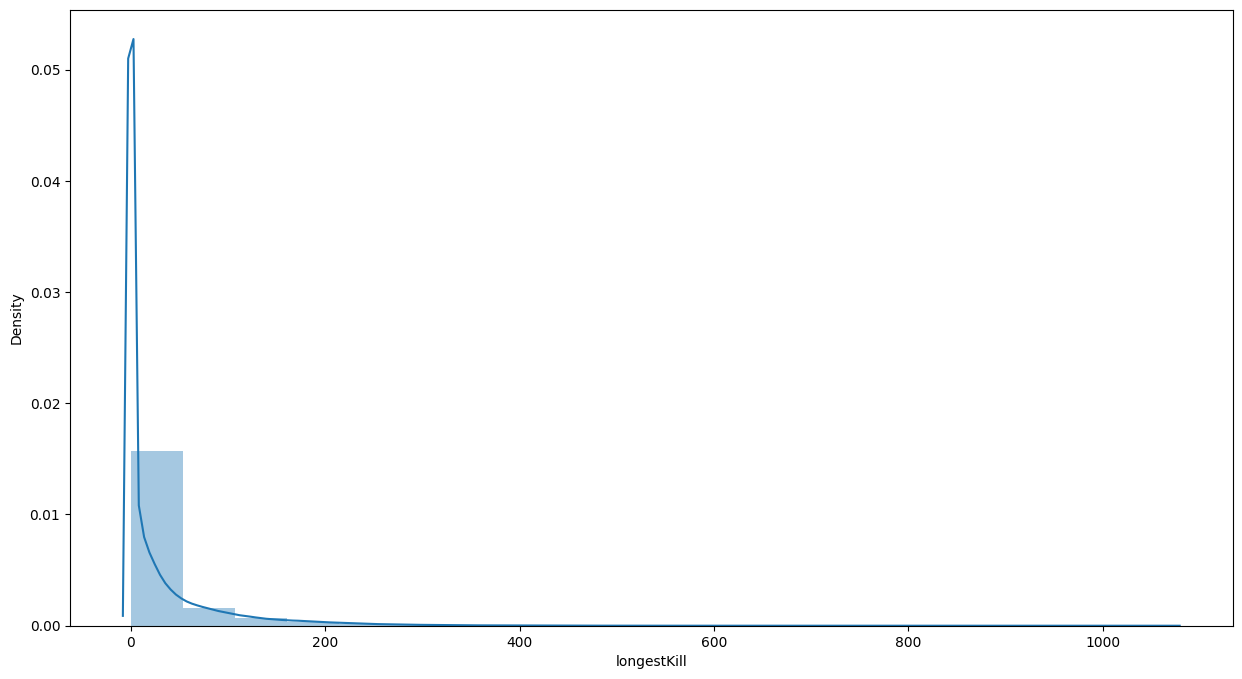

In [38]:

#longetKill 
#distplot
plt.subplots(figsize=(15,8))
sns.distplot(train['longestKill'],bins=20)

In [65]:

# Let's take a look at the players who make these shots. 
train[train['longestKill']>=1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,player_played,total_distance,players_joined,players_in_a_team,max_team
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,1,3052.00,9,0,0.9231,88,3775.20,88,3,4
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0,48.87,38,1500,0.5385,29,48.87,23,2,2
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0,1264.00,26,0,1.0000,51,2981.00,48,4,4
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0,2848.00,4,1500,0.9412,52,2848.00,52,1,1
2122128,42df3102cb540b,7d9b2be15b355b,610d78f3affd2e,5,0,2500.0,0,7,1,2,...,0,464.50,52,0,0.0000,10,464.50,8,3,4
2152425,4b9f61bac5eb0a,bc717b964f3bbe,838cb9a3c94598,3,0,945.4,0,0,0,11,...,0,844.70,14,0,0.5714,60,844.70,37,3,4
2592718,24e0fec84c18e9,8404855ca02e48,e886a8ebb702cf,7,0,1684.0,0,4,7,11,...,0,1115.00,54,1500,0.5714,26,4851.00,18,1,1
2981715,7f77051c7cef52,d6579a630399b5,4784f7d9a06b51,3,5,1025.0,5,2,5,2,...,0,3998.00,7,0,1.0000,93,4085.96,93,2,2
3255171,5524c154448425,674195558ad41b,db6f6d1f0d4904,1,0,1355.0,0,2,0,9,...,0,1039.00,37,0,0.5789,21,1039.00,16,1,1
3304284,d0c286ce498e17,17fdd45e612bab,3eaaa2f7a360fe,7,0,2330.0,0,2,0,2,...,0,68.02,32,0,1.0000,53,68.02,33,3,4


In [66]:

# Let's take a look at the players who make these shots. 
test[test['longestKill']>=1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,player_played,total_distance,players_joined,players_in_a_team,max_team
15085,b2d7b5499c7fdd,c57312c6ebd390,5fb683abbf1f33,4,0,1119.0,0,2,3,11,...,0,0,1135.0,19,0,48,1190.4,39,4,4


In [67]:
# drop outliers.      


#train
train.drop(train[train['longestKill']>=1000].index,inplace=True)

#test

test.drop(test[test['longestKill']>=1000].index,inplace=True)

In [68]:
train[['rideDistance','walkDistance','swimDistance','total_distance']].head()

,rideDistance,walkDistance,swimDistance,total_distance
0,0.0000,244.80,0.00,244.8000
1,0.0045,1434.00,11.04,1445.0445
2,0.0000,161.80,0.00,161.8000
3,0.0000,202.70,0.00,202.7000
4,0.0000,49.75,0.00,49.7500


In [70]:
test[['rideDistance','walkDistance','swimDistance','total_distance']].head()

,rideDistance,walkDistance,swimDistance,total_distance
0,0.0,588.0,0.0,588.0
1,4669.0,2017.0,0.0,6686.0
2,0.0,787.8,0.0,787.8
3,0.0,1812.0,0.0,1812.0
4,0.0,2963.0,0.0,2963.0


C:\Users\sarth\AppData\Local\Temp\ipykernel_19004\2243201589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['walkDistance'], bins=10)


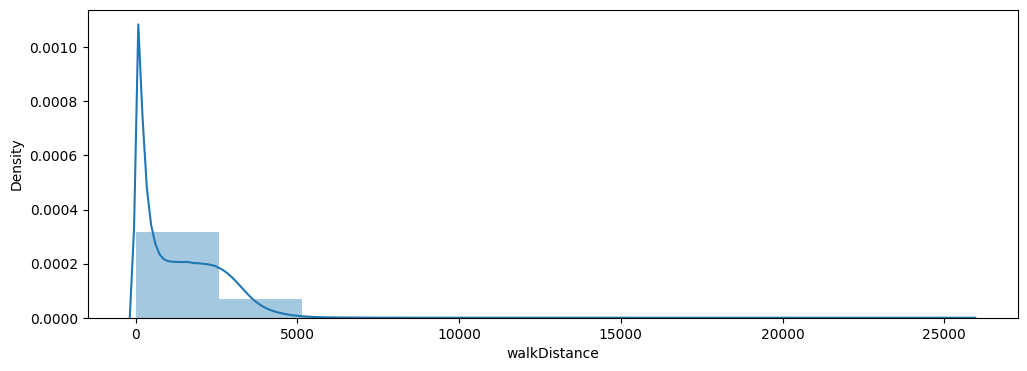

In [69]:

plt.figure(figsize=(12,4))
sns.distplot(train['walkDistance'], bins=10)
plt.show()


In [71]:

#Remove the outliers

#train
train.drop(train[train['walkDistance']>=10000].index,inplace=True)


#test
test.drop(test[test['walkDistance']>=10000].index,inplace=True)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528429 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539205 entries, 0 to 1934173
Data columns (total 33 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1539205 non-null  object 
 1   groupId            1539205 non-null  object 
 2   matchId            1539205 non-null  object 
 3   assists            1539205 non-null  int64  
 4   boosts             1539205 non-null  int64  
 5   damageDealt        1539205 non-null  float64
 6   DBNOs              1539205 non-null  int64  
 7   headshotKills      1539205 non-null  int64  
 8   heals              1539205 non-null  int64  
 9   killPlace          1539205 non-null  int64  
 10  killPoints         1539205 non-null  int64  
 11  kills              1539205 non-null  int64  
 12  killStreaks        1539205 non-null  int64  
 13  longestKill        1539205 non-null  float64
 14  matchDuration      1539205 non-null  int64  
 15  matchType          1539205 non-null  

C:\Users\sarth\AppData\Local\Temp\ipykernel_19004\3029973416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.rideDistance,bins=10)


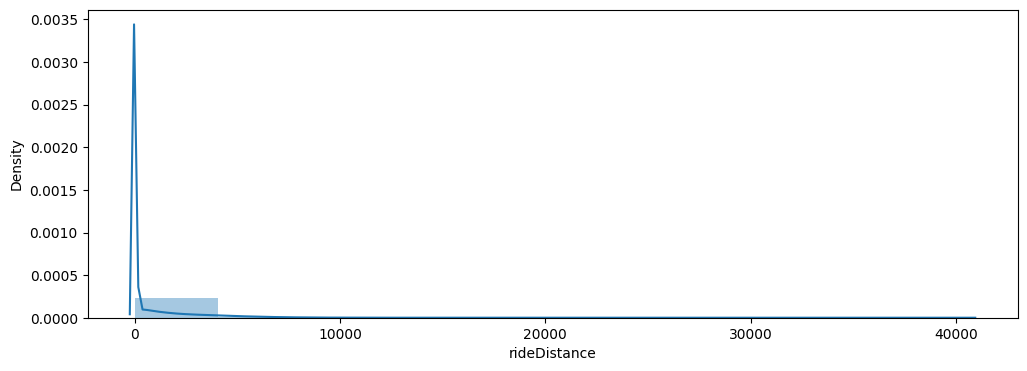

In [74]:
plt.subplots(figsize=(12,4))
sns.distplot(train.rideDistance,bins=10)
plt.show()

In [75]:
#test

train.drop(train[train.rideDistance >=15000].index, inplace=True)

#test

test.drop(test[test.rideDistance >=15000].index, inplace=True)
     

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3527948 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa

C:\Users\sarth\AppData\Local\Temp\ipykernel_19004\3473420873.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.swimDistance,bins=10)


<Axes: xlabel='swimDistance', ylabel='Density'>

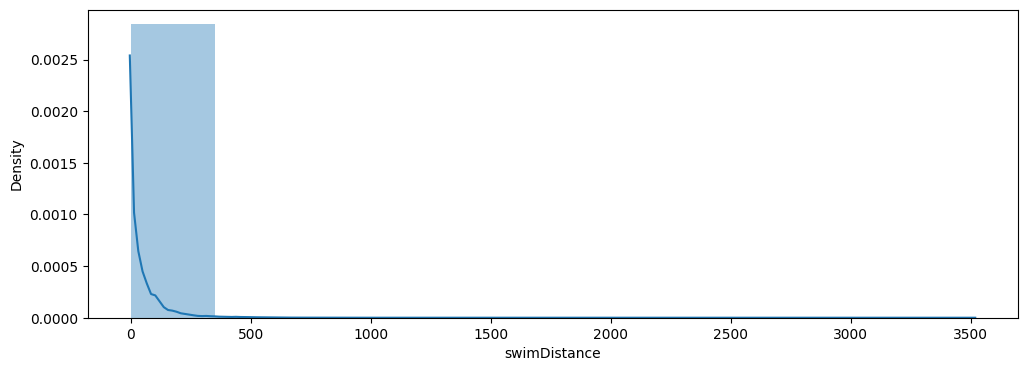

In [77]:
# swimDistance
plt.subplots(figsize=(12, 4))
sns.distplot(train.swimDistance,bins=10)

In [78]:
train[train['swimDistance']>=1000].shape
     

(130, 34)

In [79]:

#Remove the ouliers.

#train
train.drop(train[train.swimDistance>=1000].index,inplace=True)

#test
test.drop(test[test.swimDistance>=1000].index,inplace=True)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3527818 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa

C:\Users\sarth\AppData\Local\Temp\ipykernel_19004\662796037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.total_distance,bins=10)


<Axes: xlabel='total_distance', ylabel='Density'>

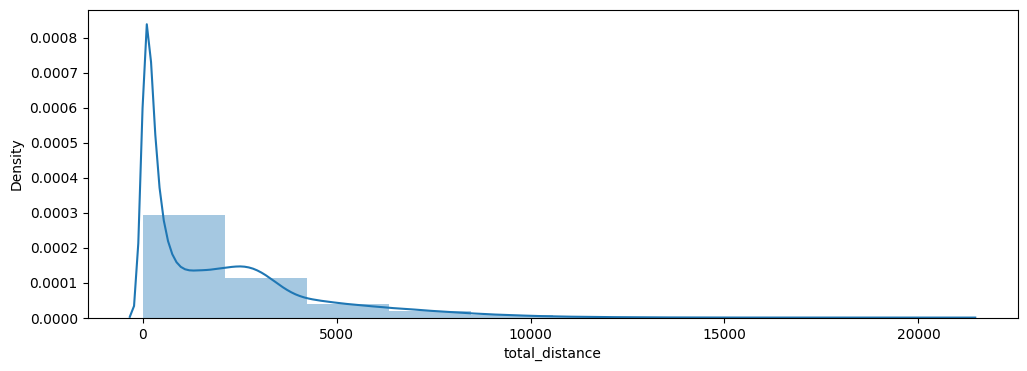

In [81]:
# total_distance
plt.subplots(figsize=(12,4))
sns.distplot(train.total_distance,bins=10)

In [82]:

train[train.total_distance>=15000].shape

(503, 34)

In [83]:
#Remove the outliers.

#train
train.drop(train[train.total_distance>=15000].index,inplace=True)

#test
test.drop(test[test.total_distance>=15000].index,inplace=True)


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3527315 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa

C:\Users\sarth\AppData\Local\Temp\ipykernel_19004\4235907921.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['weaponsAcquired'], bins=100)


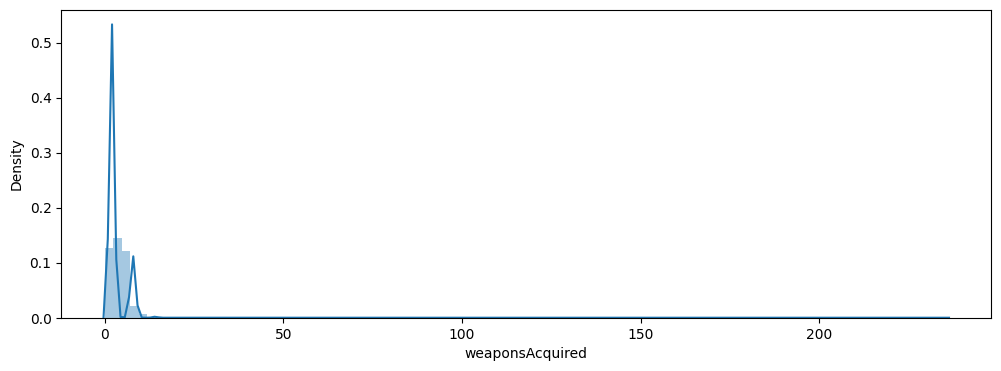

In [85]:
#weaponsAcquired
#distplot

plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()

In [86]:
train[train.weaponsAcquired>=50].shape

(126, 34)

In [87]:
# remove the outliers.

#train
train.drop(train[train.weaponsAcquired>=50].index,inplace=True)

#test
test.drop(test[test.weaponsAcquired>=50].index,inplace=True)

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3527189 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa

C:\Users\sarth\AppData\Local\Temp\ipykernel_19004\3445597730.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.heals, bins=20)


<Axes: xlabel='heals', ylabel='Density'>

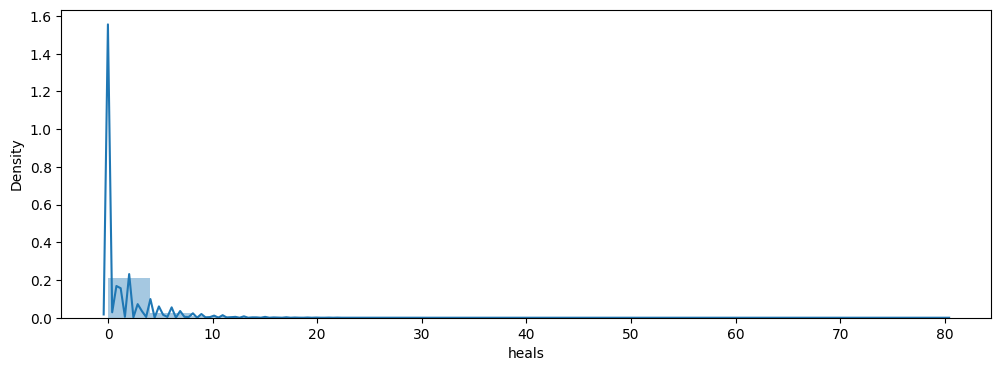

In [89]:
#heals 
#distplot

plt.subplots(figsize=(12,4))
sns.distplot(train.heals, bins=20)

In [90]:

train[train.heals>=40].shape

(132, 34)

In [91]:

# remove the outliers.

#train
train.drop(train[train.heals>=40].index,inplace=True)

#test

test.drop(test[test.heals>=40].index,inplace=True)


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3527057 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance       floa